In [22]:
#!pip install matplotlib_scalebar

In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.patches as mpatches

In [2]:
# Define the area of interest
place_name = "San Francisco, California, USA"

In [3]:
# Fetch green spaces data
green_tags = {'leisure': ['park', 'garden'], 'natural': ['wood', 'tree_row', 'scrub'], 'landuse': ['forest', 'grass']}
greenspaces = ox.geometries_from_place(place_name, green_tags)

# Fetch water features data
water_tags = {'natural': ['water'], 'waterway': True}
water = ox.geometries_from_place(place_name, water_tags)

# Fetch urban features data
urban_tags = {'building': True, 'highway': True}
urban = ox.geometries_from_place(place_name, urban_tags)

C:\Users\janak\AppData\Local\Temp\ipykernel_12476\4011600865.py:3: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  greenspaces = ox.geometries_from_place(place_name, green_tags)
C:\Users\janak\AppData\Local\Temp\ipykernel_12476\4011600865.py:7: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  water = ox.geometries_from_place(place_name, water_tags)
C:\Users\janak\AppData\Local\Temp\ipykernel_12476\40

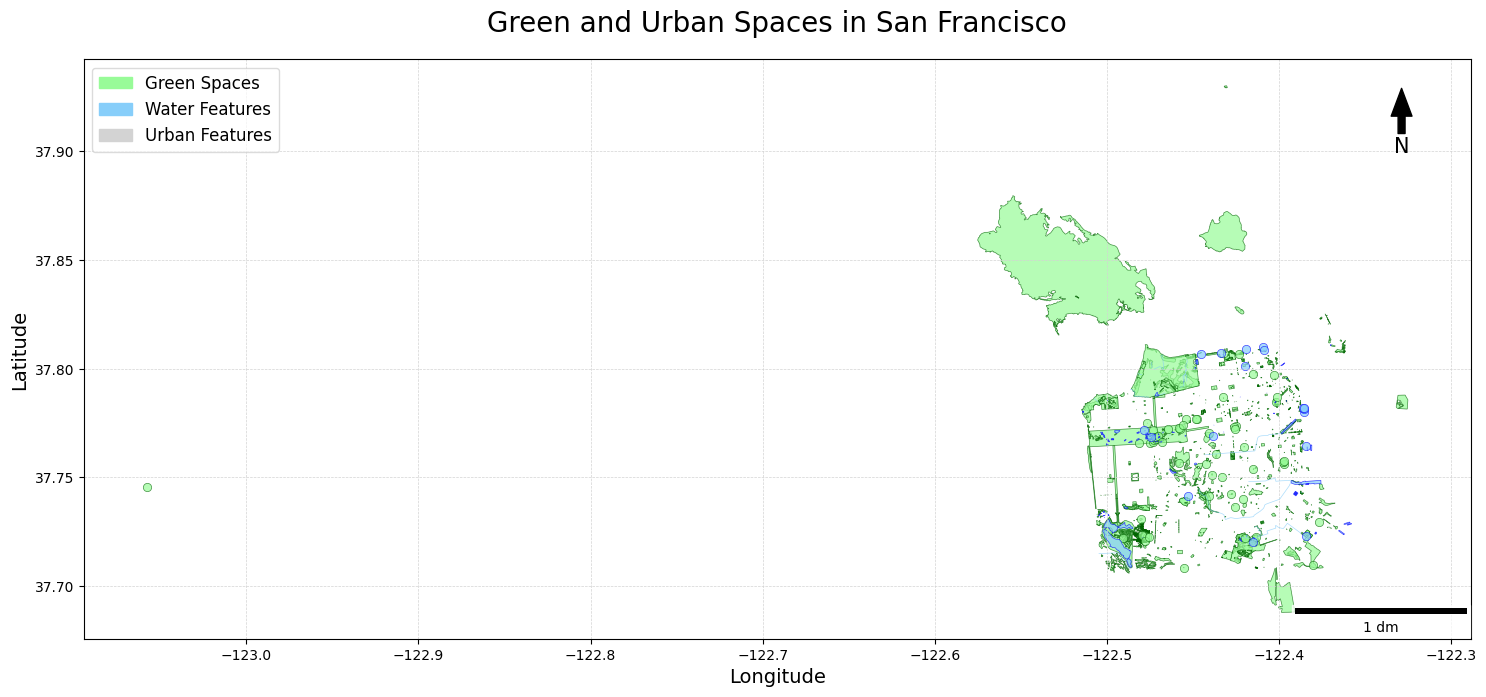

In [5]:
# Create the plot
fig, ax = plt.subplots(figsize=(15, 15))

# Re-symbolize green spaces
greenspaces.plot(ax=ax, color='#98fb98', alpha=0.7, edgecolor='#006400', linewidth=0.5)

# Re-symbolize water features
water.plot(ax=ax, color='#87CEFA', alpha=0.7, edgecolor='#0000FF', linewidth=0.5)

# Re-symbolize urban features
#urban.plot(ax=ax, color='#d3d3d3', alpha=0.6, edgecolor='#696969', linewidth=0.5)

# Add grid lines
ax.grid(True, which='both', color='lightgrey', linestyle='--', linewidth=0.5)

# Add a scale bar
scalebar = ScaleBar(1, location='lower right', box_alpha=0.7, color='black')
ax.add_artist(scalebar)

# Add a north arrow
x, y, arrow_length = 0.95, 0.95, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15, headlength=20),
            ha='center', va='center', fontsize=15, xycoords=ax.transAxes)

# Add a legend
park_patch = mpatches.Patch(color='#98fb98', label='Green Spaces')
water_patch = mpatches.Patch(color='#87CEFA', label='Water Features')
urban_patch = mpatches.Patch(color='#d3d3d3', label='Urban Features')
plt.legend(handles=[park_patch, water_patch, urban_patch], loc='upper left', fontsize=12, frameon=True, framealpha=0.7)

# Add title and labels
ax.set_title('Green and Urban Spaces in San Francisco', fontsize=20, pad=20)
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Adjust the plot
plt.tight_layout()
# Save the map as a PNG file
plt.savefig('san_francisco_greenspaces.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()